[start of section 5.1](#tables)

[5.2](#5.2)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/ds-modules/course-assets/gh-pages/materials/su20/Spotify/spotify.csv'
spotify = pd.read_csv(url)

# Dropping unnecessary columns
spotify = spotify.drop(['Unnamed: 0', 'track_album_id', 'playlist_id'], axis=1)

# Converting date to datetime to visualize datetime
spotify['track_album_release_date'] = pd.to_datetime(spotify['track_album_release_date']) 

# Creating columns 
spotify['duration_sec'] = spotify['duration_ms']/1000

In [3]:
spotify.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity  \
0        Ed Sheeran                66   
1          Maroon 5                67   
2      Zara Larsson                70   
3  The Chainsmokers                60   
4     Lewis Capaldi                69   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name playlist_genre playlist_subgenre  danceability  ...  loudness  \
0     Pop Remix            pop         dance pop         0.748  ...    -2.634   
1     Pop Remix            pop         dance pop         0.726  ...    -4.969   
2     Pop Remix            pop         dance pop         0.675  ...    -3.432   
3     Pop Remix            pop         dance pop         0.718  ...    -3.778   
4     Pop Remix            pop         dance pop         0.650  ...    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  duration_sec  
0  122.036     194754.0       194.754  
1   99.972     162600.0       162.600  
2  124.008     176616.0       176.616  
3  121.956     169093.0       169.093  
4  123.976     189052.0       189.052  

[5 rows x 22 columns]

In [4]:
spotify.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_name', 'track_album_release_date', 'playlist_name',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'duration_sec'],
      dtype='object')

In [5]:
spotify['loudness'].describe()

count    32833.000000
mean        -6.719499
std          2.988436
min        -46.448000
25%         -8.171000
50%         -6.166000
75%         -4.645000
max          1.275000
Name: loudness, dtype: float64

In [6]:
spotify['track_artist'].unique()

array(['Ed Sheeran', 'Maroon 5', 'Zara Larsson', ...,
       'Ferry Corsten feat. Jenny Wahlstrom', 'Tegan and Sara', 'Mat Zo'],
      dtype=object)

## Functions and Visualization

In [7]:
def distplots(column, artist1, artist2):

    '''
    Display overlapping histograms of some attribute of music of two different artists.
    
    Parameters:
    column - the attribute to be compared.
    artist1, artist2 - two artists from the spotify table.
    '''
    
    if artist1 not in spotify['track_artist'].unique() or artist2 not in spotify['track_artist'].unique():
        return ("Unable to plot graphs: artist(s) not found.")
    
    plt.figure(figsize=(10, 5))
    
    artist1_df = spotify[spotify['track_artist'] == artist1]
    artist2_df = spotify[spotify['track_artist'] == artist2]
   
    sns.distplot(artist1_df[column], label = artist1)
    sns.distplot(artist2_df[column], label = artist2)
    
    plt.legend()

In [8]:
# distplots('loudness', 'Katy')

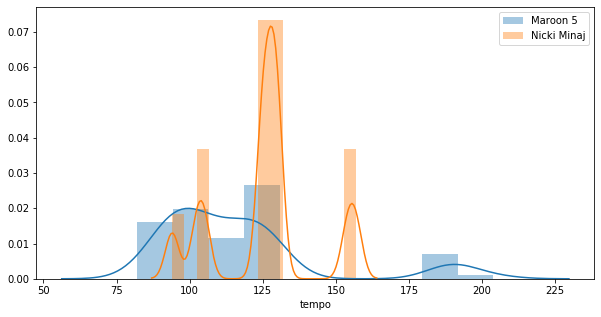

In [9]:
distplots('tempo', 'Maroon 5', 'Nicki Minaj')

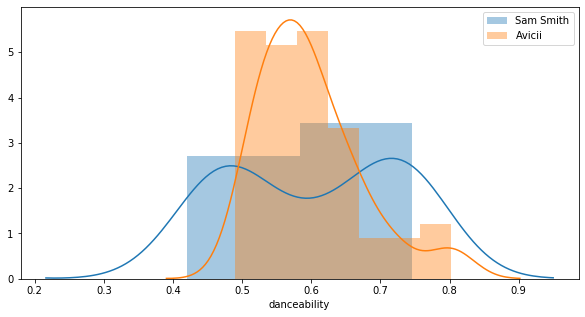

In [10]:
distplots('danceability', 'Sam Smith', 'Avicii')

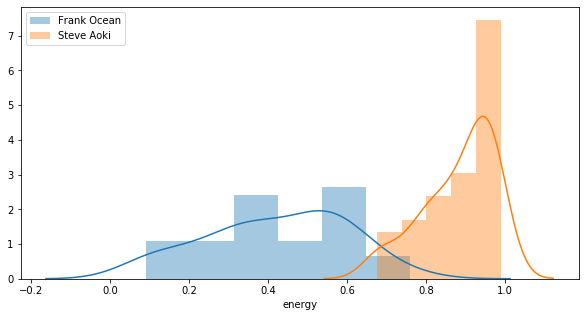

In [11]:
distplots('energy', 'Frank Ocean', 'Steve Aoki')

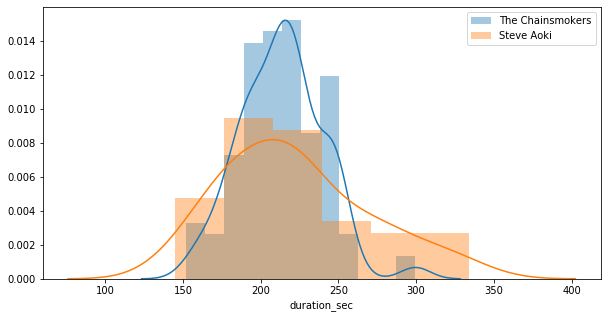

In [12]:
distplots('duration_sec', 'The Chainsmokers', 'Steve Aoki')

# Analyzing Playlist Popularity by Track

In [13]:
names = spotify['playlist_name'].unique()
popularities = []
count = []

for playlist in names:
    subset = spotify[spotify['playlist_name'] == playlist]
    popularities.append(subset['track_popularity'].sum())
    count.append(len(subset))
    

In [14]:
playlist_pop = pd.DataFrame({'Playlist Name': names, 
              'Aggregate Popularity': popularities,
              'Number of Tracks': count})
playlist_pop.head()

Playlist Name  Aggregate Popularity  Number of Tracks
0       Pop Remix                  4174                70
1       Dance Pop                  8380               138
2      Dance Room                  3355                56
3          Cardio                  2641                49
4  Dance Pop Hits                  4051                63

In [15]:
playlist_pop.sort_values(by='Aggregate Popularity', ascending=False).head()

Playlist Name  Aggregate Popularity  \
253     2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥                 20547   
193                                     Permanent Wave                 13261   
63                                     Indie Poptimism                 13107   
321  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...                 12670   
15   Ultimate Indie Presents... Best Indie Tracks o...                 11840   

     Number of Tracks  
253               247  
193               244  
63                308  
321               189  
15                198

In [16]:
playlist_pop.sort_values(by='Number of Tracks', ascending=False).head()

Playlist Name  Aggregate Popularity  \
63                                     Indie Poptimism                 13107   
253     2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥                 20547   
193                                     Permanent Wave                 13261   
208                                  Hard Rock Workout                  8713   
15   Ultimate Indie Presents... Best Indie Tracks o...                 11840   

     Number of Tracks  
63                308  
253               247  
193               244  
208               219  
15                198

In [17]:
playlist_pop['Proportion'] = playlist_pop['Aggregate Popularity']/playlist_pop['Number of Tracks']

In [18]:
playlist_pop.sort_values(by='Proportion', ascending=False).head()
# Can do this with groupby

Playlist Name  Aggregate Popularity  \
253   2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥                 20547   
73                                         RapCaviar                  3985   
302                         Most Popular 2020 TOP 50                  3808   
19   Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop                  7913   
261                                  Baila Reggaeton                  3885   

     Number of Tracks  Proportion  
253               247   83.186235  
73                 50   79.700000  
302                48   79.333333  
19                100   79.130000  
261                50   77.700000

In [19]:
# Further visualization

artists = spotify['track_artist'].unique()
popular_artists = []
count_artists = []

for artist in artists:
    subset = spotify[spotify['track_artist'] == artist]
    count_artists.append(len(subset))
    
    
popular_artists = pd.DataFrame({'Artist': artists, 
              'Number of Tracks': count_artists})

popular_artists

Artist  Number of Tracks
0                               Ed Sheeran                69
1                                 Maroon 5                71
2                             Zara Larsson                28
3                         The Chainsmokers               123
4                            Lewis Capaldi                21
...                                    ...               ...
10688                         The Cataracs                 1
10689                              Qubicon                 1
10690  Ferry Corsten feat. Jenny Wahlstrom                 1
10691                       Tegan and Sara                 1
10692                               Mat Zo                 1

[10693 rows x 2 columns]

In [20]:
# top 10 artists
popular_artists.sort_values('Number of Tracks', ascending=False).head(10)

Artist  Number of Tracks
11                Martin Garrix               161
1053                      Queen               136
3              The Chainsmokers               123
13                 David Guetta               110
1215                   Don Omar               102
1161                      Drake               100
93    Dimitri Vegas & Like Mike                93
36                Calvin Harris                91
132                    Hardwell                84
27                         Kygo                83

## Converting to `datascience` style

In [21]:
from datascience import *

# Ch. 5.1 Interlude: Tables <a id='tables'></a>
### Loading datasets
Tables are often created from files that contain comma separated values, called CSV files. Sometimes these files are stored locally on our computers, and sometimes they are stored remotely, such as on Github. Below, we use the method `Table.read_table` to read the csv file from the given url, and we store the resulting table with the name `Spotify`.

In [74]:
url = 'https://raw.githubusercontent.com/ds-modules/course-assets/gh-pages/materials/su20/Spotify/spotify.csv'
spotify = Table.read_table(url)
spotify

Unnamed: 0 | track_id               | track_name                                            | track_artist     | track_popularity | track_album_id         | track_album_name                                      | track_album_release_date | playlist_name | playlist_id            | playlist_genre | playlist_subgenre | danceability | energy | key  | loudness | mode | speechiness | acousticness | instrumentalness | liveness | valence | tempo   | duration_ms
1          | 6f807x0ima9a1j3VPbc7VN | I Don't Care (with Justin Bieber) - Loud Luxury Remix | Ed Sheeran       | 66               | 2oCs0DGTsRO98Gh5ZSl2Cx | I Don't Care (with Justin Bieber) [Loud Luxury Remix] | 2019-06-14               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.748        | 0.916  | 6    | -2.634   | 1    | 0.0583      | 0.102        | 0                | 0.0653   | 0.518   | 122.036 | 194754
2          | 0r7CVbZTWZgbTCYdfa2P31 | Memories - Dillon Francis Remix                       | Maroon 5         | 67               | 63rPSO264uRjW1X5E6cWv6 | Memories (Dillon Francis Remix)                       | 2019-12-13               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.726        | 0.815  | 11   | -4.969   | 1    | 0.0373      | 0.0724       | 0.00421          | 0.357    | 0.693   | 99.972  | 162600
3          | 1z1Hg7Vb0AhHDiEmnDE79l | All the Time - Don Diablo Remix                       | Zara Larsson     | 70               | 1HoSmj2eLcsrR0vE9gThr4 | All the Time (Don Diablo Remix)                       | 2019-07-05               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.675        | 0.931  | 1    | -3.432   | 0    | 0.0742      | 0.0794       | 2.33e-05         | 0.11     | 0.613   | 124.008 | 176616
4          | 75FpbthrwQmzHlBJLuGdC7 | Call You Mine - Keanu Silva Remix                     | The Chainsmokers | 60               | 1nqYsOef1yKKuGOVchbsk6 | Call You Mine - The Remixes                           | 2019-07-19               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.718        | 0.93   | 7    | -3.778   | 1    | 0.102       | 0.0287       | 9.43e-06         | 0.204    | 0.277   | 121.956 | 169093
5          | 1e8PAfcKUYoKkxPhrHqw4x | Someone You Loved - Future Humans Remix               | Lewis Capaldi    | 69               | 7m7vv9wlQ4i0LFuJiE2zsQ | Someone You Loved (Future Humans Remix)               | 2019-03-05               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.65         | 0.833  | 1    | -4.672   | 1    | 0.0359      | 0.0803       | 0                | 0.0833   | 0.725   | 123.976 | 189052
6          | 7fvUMiyapMsRRxr07cU8Ef | Beautiful People (feat. Khalid) - Jack Wins Remix     | Ed Sheeran       | 67               | 2yiy9cd2QktrNvWC2EUi0k | Beautiful People (feat. Khalid) [Jack Wins Remix]     | 2019-07-11               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.675        | 0.919  | 8    | -5.385   | 1    | 0.127       | 0.0799       | 0                | 0.143    | 0.585   | 124.982 | 163049
7          | 2OAylPUDDfwRGfe0lYqlCQ | Never Really Over - R3HAB Remix                       | Katy Perry       | 62               | 7INHYSeusaFlyrHSNxm8qH | Never Really Over (R3HAB Remix)                       | 2019-07-26               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.449        | 0.856  | 5    | -4.788   | 0    | 0.0623      | 0.187        | 0                | 0.176    | 0.152   | 112.648 | 187675
8          | 6b1RNvAcJjQH73eZO4BLAB | Post Malone (feat. RANI) - GATTÜSO Remix              | Sam Feldt        | 69               | 6703SRPsLkS4bPtMFFJes1 | Post Malone (feat. RANI) [GATTÜSO Remix]              | 2019-08-29               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.542        | 0.903  | 4    | -2.419   | 0    | 0.04

### Accessing columns
The simplest way to access data in a table is the `column` method, which takes in the name of the column as its only argument. It returns the contents of the column as an array. Imagine that we want to know the duration of all the songs in our dataset. We can access the `duration_ms` column using the column method.

In [76]:
spotify.column("duration_ms")

array([194754., 162600., 176616., ..., 210112., 367432., 337500.])

We can give this array a name in order to more easily work with the values in it! The name can be whatever we want, but for clarity we'll simply name it `duration`.

In [77]:
duration = spotify.column("duration_ms")
duration

array([194754., 162600., 176616., ..., 210112., 367432., 337500.])

Since `duration` is just an array, we can perform array operations on it.

### Functions Applied to Track Durations
Right now, the `duration` array contains the length of each song in milliseconds. However, that's not a common measurement when describint the length of a song - often, we use minutes and seconds. Using array arithmetic, we can find the length of each song in seconds and in minutes. There are 1000 milliseconds in a second, and 60 seconds in a minute. First, we will convert milliseconds to seconds.

In [78]:
duration_seconds = duration / 1000
duration_seconds

array([194.754, 162.6  , 176.616, ..., 210.112, 367.432, 337.5  ])

Now that we have a new array of the duration of songs in seconds, we can use that to convert to duration in minutes using similar array math.

In [79]:
duration_minutes = duration_seconds / 60
duration_minutes 

array([3.2459    , 2.71      , 2.9436    , ..., 3.50186667, 6.12386667,
       5.625     ])

If you are interested in the average length of a song, you can find the mean of the array with built in methods.

In [80]:
duration_minutes.mean()

3.7633301937075503

## 5.2 Visualizing Categorical Distributions <a id = '5.2'></a>

In [84]:
spotify.num_rows

32833

## Example: Spotify
Our Spotify data contains a lot of numerical information about different aspects of the songs, such as danceability, liveliness, tempo, energy, etc. In this section, we are interested in the categorical information in our dataset, such as the playlist each song comes from or the genre. There are almost 33,000 songs in our dataset, so let's do some investigating. What are the most popular genres? We can figure this out by grouping by the playlist genre.

In [85]:
spotify.group('playlist_genre')

playlist_genre | count
edm            | 6043
latin          | 5155
pop            | 5507
r&b            | 5431
rap            | 5746
rock           | 4951

In our dataset, it looks like the most popular genre is EDM. We can create a barchart to show how the other genres compare.

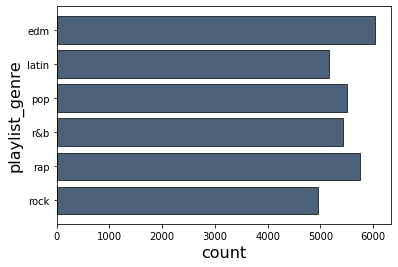

In [86]:
genre_counts = spotify.group('playlist_genre')
genre_counts.barh('playlist_genre', 'count')

The bars aren't ordered by length, so it's a little difficult to compare. We can use a more complicated method of sorting to make our bar chart more readable.

In [87]:
genre_counts_sorted = genre_counts.sort('count', descending=True)
genre_counts_sorted

playlist_genre | count
edm            | 6043
rap            | 5746
pop            | 5507
r&b            | 5431
latin          | 5155
rock           | 4951

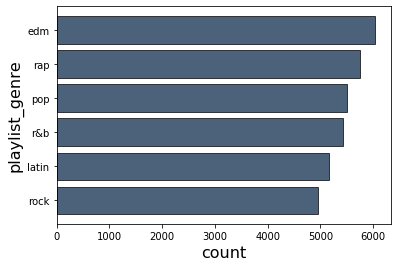

In [88]:
genre_counts_sorted.barh('playlist_genre', 'count')

This makes it much easier to see the ranking of most popular genres.

Let's take a look at all the artists in the dataset. We can take a look at the top 25 artists based on the number of songs they have in our dataset. We'll follow a similar method as we did when grouping by genre above. First, we will group our data by artist and sort by count.

In [89]:
artists_grouped = spotify.group('track_artist').sort('count', descending=True)
artists_grouped

track_artist              | count
Martin Garrix             | 161
Queen                     | 136
The Chainsmokers          | 123
David Guetta              | 110
Don Omar                  | 102
Drake                     | 100
Dimitri Vegas & Like Mike | 93
Calvin Harris             | 91
Hardwell                  | 84
Kygo                      | 83
... (10683 rows omitted)

The output displays the top 10 artists, but there are over 10,000 artists in our dataset. A visualization with every artist would be very hard to read, so we will focus on the top 25 artists.

In [93]:
top_artists = artists_grouped.take[:25]
top_artists

track_artist              | count
Martin Garrix             | 161
Queen                     | 136
The Chainsmokers          | 123
David Guetta              | 110
Don Omar                  | 102
Drake                     | 100
Dimitri Vegas & Like Mike | 93
Calvin Harris             | 91
Hardwell                  | 84
Kygo                      | 83
... (15 rows omitted)

Creating a bar chart of the number of songs for each artists lets us easily compare the differences between artists.

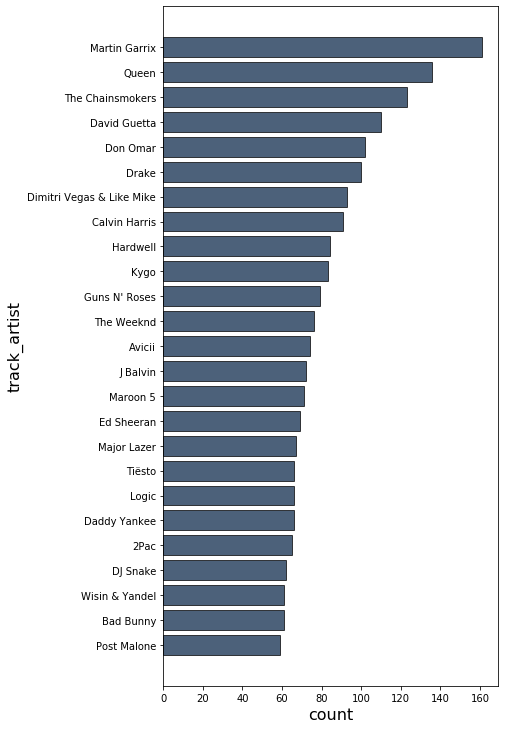

In [97]:
top_artists.barh('track_artist', 'count')

A quick look through the top 25 shows us that all of the top artists are males.

### Proportions
The above bar chart shows the number of songs each artist had in the dataset. But what it doesn't tell us is the proportion of songs in the dataset by each artist. Remember that the columns of our table are arrays, so we can use array arithmetic to compute these proportions.

In [107]:
total_songs_dataset = spotify.num_rows
artists_proportions = top_artists.column('count') / total_songs_dataset
artists_proportions

array([0.0049036 , 0.00414217, 0.00374623, 0.00335029, 0.00310663,
       0.00304572, 0.00283252, 0.0027716 , 0.0025584 , 0.00252794,
       0.00240612, 0.00231474, 0.00225383, 0.00219292, 0.00216246,
       0.00210154, 0.00204063, 0.00201017, 0.00201017, 0.00201017,
       0.00197972, 0.00188834, 0.00185789, 0.00185789, 0.00179697])

We can add the array of proportions as a new column in our `top_artists` table.

In [109]:
top_artists_proportions = top_artists.with_columns('proportion', artists_proportions)
top_artists_proportions

track_artist              | count | proportion
Martin Garrix             | 161   | 0.0049036
Queen                     | 136   | 0.00414217
The Chainsmokers          | 123   | 0.00374623
David Guetta              | 110   | 0.00335029
Don Omar                  | 102   | 0.00310663
Drake                     | 100   | 0.00304572
Dimitri Vegas & Like Mike | 93    | 0.00283252
Calvin Harris             | 91    | 0.0027716
Hardwell                  | 84    | 0.0025584
Kygo                      | 83    | 0.00252794
... (15 rows omitted)

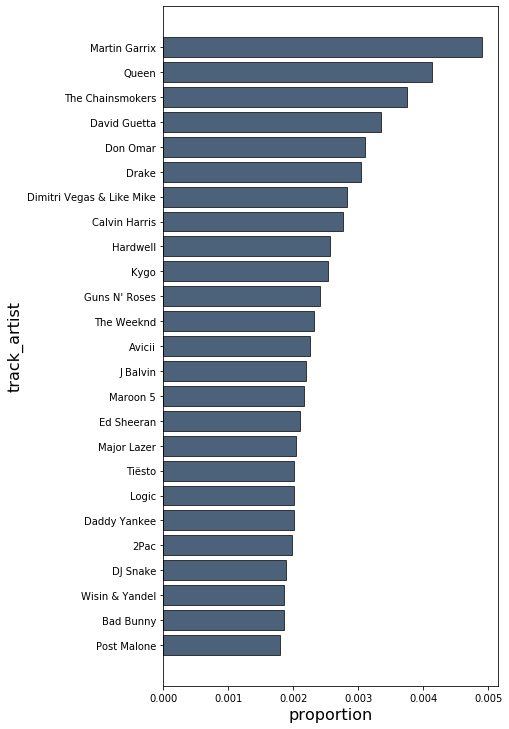

In [110]:
top_artists_proportions.barh('track_artist', 'proportion')

The proportions tell us that songs by Martin Garrix make up about 0.5% of the data. That's pretty small - not even an entire percent. Now that we know the proportions for each artist, we can compute the proportion of songs in the entire data set that are by the top 25 artists.

In [111]:
sum(top_artists_proportions.column('proportion'))

0.06386866871744891

About 6% of the songs in the dataset are produced by the top 25 artists.

## Towards numerical variables
Most of the time, we are not solely interested in categorical variables. Our spotify data also contains information on the release date of the track, so we can see how many songs were released each year.

In [43]:
# Adding in playlist creation year through pandas --> must be done outside of notebook
spotify['creation_year'] = [x.year for x in pd.Series(spotify.select('track_album_release_date')[0]).apply(pd.to_datetime)]

In [44]:
grouped_years = spotify.select('track_artist', 'creation_year').group('creation_year').sort('count', descending=True)
grouped_years

creation_year | count
2019          | 9081
2018          | 3312
2017          | 2430
2016          | 2127
2015          | 1779
2014          | 1524
2013          | 956
2012          | 786
2020          | 785
2008          | 622
... (53 rows omitted)

Sorting by the descending count lets us see which years had the most songs.

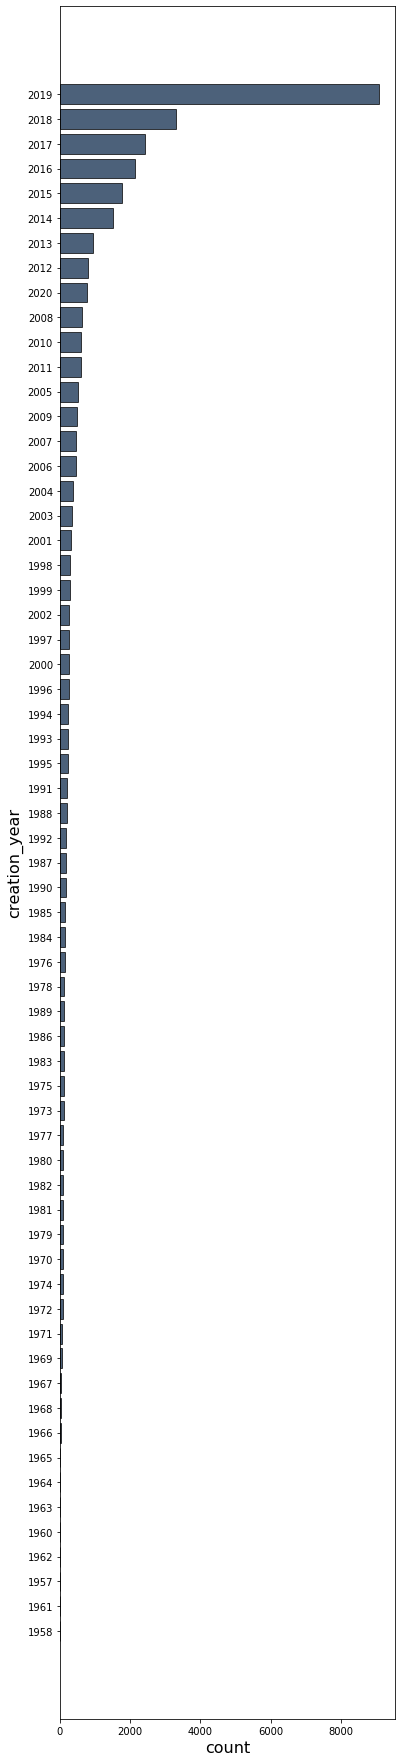

In [45]:
grouped_years.barh('creation_year', 'count')

The longest bars correspond to most recent years, but if you look closely, the years are not listed in chronological order. Years are a fixed chronological unit that have a specified order, but the bar chart is treating year as a categorical variable. We can sort by year instead of by count in order to get a chronological bar chart.

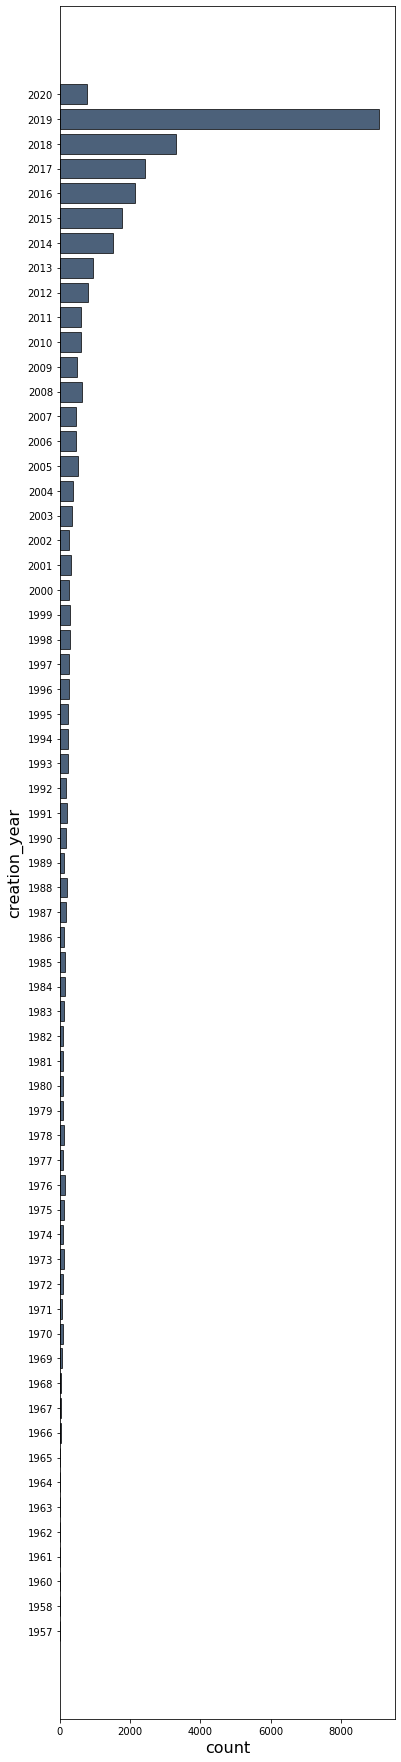

In [113]:
grouped_years.sort('creation_year', descending=True).barh('creation_year', 'count')

Now we can see that more songs have been released in more recent years. The bar for 202 is much shorter than the bar for 2019, because 2020 was only a few months along when the data was downloaded.

## Towards Numerical Variables - more exploration

In [36]:
spotify

Unnamed: 0 | track_id               | track_name                                            | track_artist     | track_popularity | track_album_id         | track_album_name                                      | track_album_release_date | playlist_name | playlist_id            | playlist_genre | playlist_subgenre | danceability | energy | key  | loudness | mode | speechiness | acousticness | instrumentalness | liveness | valence | tempo   | duration_ms | creation_year
1          | 6f807x0ima9a1j3VPbc7VN | I Don't Care (with Justin Bieber) - Loud Luxury Remix | Ed Sheeran       | 66               | 2oCs0DGTsRO98Gh5ZSl2Cx | I Don't Care (with Justin Bieber) [Loud Luxury Remix] | 2019-06-14               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.748        | 0.916  | 6    | -2.634   | 1    | 0.0583      | 0.102        | 0                | 0.0653   | 0.518   | 122.036 | 194754      | 2019
2          | 0r7CVbZTWZgbTCYdfa2P31 | Memories - Dillon Francis Remix                       | Maroon 5         | 67               | 63rPSO264uRjW1X5E6cWv6 | Memories (Dillon Francis Remix)                       | 2019-12-13               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.726        | 0.815  | 11   | -4.969   | 1    | 0.0373      | 0.0724       | 0.00421          | 0.357    | 0.693   | 99.972  | 162600      | 2019
3          | 1z1Hg7Vb0AhHDiEmnDE79l | All the Time - Don Diablo Remix                       | Zara Larsson     | 70               | 1HoSmj2eLcsrR0vE9gThr4 | All the Time (Don Diablo Remix)                       | 2019-07-05               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.675        | 0.931  | 1    | -3.432   | 0    | 0.0742      | 0.0794       | 2.33e-05         | 0.11     | 0.613   | 124.008 | 176616      | 2019
4          | 75FpbthrwQmzHlBJLuGdC7 | Call You Mine - Keanu Silva Remix                     | The Chainsmokers | 60               | 1nqYsOef1yKKuGOVchbsk6 | Call You Mine - The Remixes                           | 2019-07-19               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.718        | 0.93   | 7    | -3.778   | 1    | 0.102       | 0.0287       | 9.43e-06         | 0.204    | 0.277   | 121.956 | 169093      | 2019
5          | 1e8PAfcKUYoKkxPhrHqw4x | Someone You Loved - Future Humans Remix               | Lewis Capaldi    | 69               | 7m7vv9wlQ4i0LFuJiE2zsQ | Someone You Loved (Future Humans Remix)               | 2019-03-05               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.65         | 0.833  | 1    | -4.672   | 1    | 0.0359      | 0.0803       | 0                | 0.0833   | 0.725   | 123.976 | 189052      | 2019
6          | 7fvUMiyapMsRRxr07cU8Ef | Beautiful People (feat. Khalid) - Jack Wins Remix     | Ed Sheeran       | 67               | 2yiy9cd2QktrNvWC2EUi0k | Beautiful People (feat. Khalid) [Jack Wins Remix]     | 2019-07-11               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.675        | 0.919  | 8    | -5.385   | 1    | 0.127       | 0.0799       | 0                | 0.143    | 0.585   | 124.982 | 163049      | 2019
7          | 2OAylPUDDfwRGfe0lYqlCQ | Never Really Over - R3HAB Remix                       | Katy Perry       | 62               | 7INHYSeusaFlyrHSNxm8qH | Never Really Over (R3HAB Remix)                       | 2019-07-26               | Pop Remix     | 37i9dQZF1DXcZDD7cfEKhW | pop            | dance pop         | 0.449        | 0.856  | 5    | -4.788   | 0    | 0.0623      | 0.187        | 0                | 0.176    | 0.152   | 112.648 | 187675      | 2019
8          | 6b1RNvAcJjQH73eZO4BLAB | Post Malone (feat. RANI) - GATTÜSO Remix              | Sam Feldt        | 69               | 6703SRPsLkS4bPtMFFJes1 | Post Malone (feat. RANI) [GATTÜSO Remix]              | 2019-08-29               | Pop Remix     | 37i9dQZF1DXcZDD

In [51]:
# playlists
playlist_names = np.unique(spotify.select('playlist_name')[0])
playlist_names

array(['"Permanent Wave"', '10er Playlist', '1987-1997 OLD SKOOL JAMZ',
       "2000's hard rock",
       '2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 - 2018 - 2019 - 2020 TOP HITS',
       '2011-2014 House', '2015 songs', '2019 in Indie Poptimism',
       '2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥',
       '3rd Coast Classics', "70's Classic Rock", '70s Hard Rock',
       '70s Pop & Rock Hits and Deep Tracks',
       "80's Freestyle/Disco Dance Party (Set Crossfade to 4-Seconds)",
       "80's Songs | Top 💯 80s Music Hits", '80s / Classic Rock',
       '80s Pop & Rock Hits and Album Tracks',
       '80s-90s R&B / New Jack Swing / Funk / Dance / Soul',
       "90's Gangster Rap", "90's Hip Hop Ultimate Collection",
       "90's NEW JACK SWING", "90's Southern Hip Hop", '90s Dance Hits',
       '90s Gangsta Rap / Top Hip-hop Classics',
       '90s Hiphop / Gangsta Rap',
       '90s R&B - The BET Planet Groove/Midnight Love Mix',
       '90s-2000s Southern Hip Hop / Crunk'

the pollen playlist doesn't seem to be in this dataset

In [96]:
spotify.where('playlist_name', are.equal_to('POLLEN'))

Unnamed: 0 | track_id | track_name | track_artist | track_popularity | track_album_id | track_album_name | track_album_release_date | playlist_name | playlist_id | playlist_genre | playlist_subgenre | danceability | energy | key  | loudness | mode | speechiness | acousticness | instrumentalness | liveness | valence | tempo | duration_ms

In [56]:
edm = spotify.where('playlist_genre', are.equal_to('edm'))
edm

Unnamed: 0 | track_id               | track_name                           | track_artist     | track_popularity | track_album_id         | track_album_name        | track_album_release_date | playlist_name      | playlist_id            | playlist_genre | playlist_subgenre | danceability | energy | key  | loudness | mode | speechiness | acousticness | instrumentalness | liveness | valence | tempo   | duration_ms | creation_year
26791      | 366S9c0rQtvrkclcCSRNmB | Disease - KATFYR "Tokyo Bound" Remix | Naeleck          | 43               | 4s3VdQXA9G1RA2a4RrCCKN | Disease                 | 2013-09-16               | Electro House 2020 | 317O0e8iWJLClLGDKtieRe | edm            | electro house     | 0.677        | 0.926  | 0    | -3.307   | 1    | 0.0456      | 0.00298      | 0.507            | 0.337    | 0.108   | 128.014 | 288867      | 2013
26792      | 0nEeyKLtk5vTlbcdvgrCOH | Infinite Ammo                        | Le Castle Vania  | 46               | 3AdNvHp7wzEBY0DYz8Oiq6 | Payday                  | 2015-10-23               | Electro House 2020 | 317O0e8iWJLClLGDKtieRe | edm            | electro house     | 0.597        | 0.96   | 7    | -1.94    | 0    | 0.0627      | 9.38e-05     | 0.89             | 0.325    | 0.144   | 127.016 | 232637      | 2015
26793      | 4gxukDJiwApNEgVIh4pHgT | WOW                                  | Tiësto           | 10               | 4I2qcrUxk37AoJOMjiOCvu | WOW                     | 2018-08-24               | Electro House 2020 | 317O0e8iWJLClLGDKtieRe | edm            | electro house     | 0.601        | 0.99   | 6    | -3.016   | 1    | 0.337       | 0.00116      | 0.52             | 0.124    | 0.192   | 127.958 | 148125      | 2018
26794      | 3mLLlN1ZdHmlJHkvNON7ou | Threnody - Bombs Away Remix          | Naeleck          | 50               | 2CUUZuC9EhMcnU7zdNWWrI | Threnody                | 2016-12-26               | Electro House 2020 | 317O0e8iWJLClLGDKtieRe | edm            | electro house     | 0.836        | 0.926  | 2    | -3.728   | 1    | 0.0495      | 0.000389     | 0.32             | 0.203    | 0.148   | 127.977 | 247309      | 2016
26795      | 17NCISfYJl0GITXs8G75Ae | Loudness War                         | Fukkk Offf       | 33               | 0vXDfJsurQa6rZayRwvgtQ | Loudness War            | 2019-07-12               | Electro House 2020 | 317O0e8iWJLClLGDKtieRe | edm            | electro house     | 0.843        | 0.844  | 2    | -4.779   | 1    | 0.0749      | 0.000609     | 0.166            | 0.0458   | 0.727   | 127.98  | 285000      | 2019
26796      | 0qqgd6DGBRaI8oI0opqW0S | Deja Vu                              | Wolfgang Gartner | 36               | 61q8dE6rffx7yRsYaoyobu | Medicine                | 2018-11-02               | Electro House 2020 | 317O0e8iWJLClLGDKtieRe | edm            | electro house     | 0.662        | 0.665  | 3    | -5.689   | 0    | 0.18        | 0.000519     | 0.0515           | 0.118    | 0.332   | 127.936 | 210234      | 2018
26797      | 229MM2St7SnW43nT8ADlG8 | Game Time (feat. Ninja)              | 3LAU             | 51               | 1ZTTtYiivr4tUgHLt1f0Nh | Game Time (feat. Ninja) | 2018-11-30               | Electro House 2020 | 317O0e8iWJLClLGDKtieRe | edm            | electro house     | 0.534        | 0.957  | 1    | -4.025   | 1    | 0.0455      | 8.05e-05     | 0.758            | 0.266    | 0.52    | 95.046  | 156632      | 2018
26798      | 72qHiPkoZdxpkhyBPvehRB | Rave                                 | SOVTH            | 25               | 2VeB0Us6Pu42rgmtzdv4hI | Rave                    | 2019-12-13               | Electro House 2020 | 317O0e8iWJLClLGDKtieRe | edm            | electro house     | 0.786        | 0.955  | 5    | -6.369   | 0    | 0.0606      | 0.000906     | 0.849            | 0.396    | 0.745   | 125.996 | 200015      | 2019
26799      | 1ctoZDhYkpKa0o9B9Wjen3 | Outlaw                               | Bassjackers      | 38               | 6MnnkXC0DBgjc9mFxJ585V | The Biggest             | 2019-11-22        

In [59]:
edm.group('track_artist').sort('count', descending=True)

track_artist              | count
Martin Garrix             | 125
Dimitri Vegas & Like Mike | 79
Hardwell                  | 76
David Guetta              | 60
Tiësto                    | 49
The Chainsmokers          | 49
Calvin Harris             | 40
R3HAB                     | 38
Blasterjaxx               | 38
Bassjackers               | 38
... (2506 rows omitted)

In [66]:
female_edm = spotify.where('playlist_name', are.equal_to('Female Vocal EDM'))
female_edm

Unnamed: 0 | track_id               | track_name                              | track_artist    | track_popularity | track_album_id         | track_album_name                        | track_album_release_date | playlist_name    | playlist_id            | playlist_genre | playlist_subgenre         | danceability | energy | key  | loudness | mode | speechiness | acousticness | instrumentalness | liveness | valence | tempo   | duration_ms | creation_year
31320      | 2wQ411UQL2MRsdAgPRUstT | Walk Thru Fire                          | Vicetone        | 63               | 19cloFhfD0cKbMEzUAxugB | Walk Thru Fire                          | 2018-08-03               | Female Vocal EDM | 5QaPRbVgbEcCc9jC1UxgD1 | edm            | progressive electro house | 0.639        | 0.664  | 5    | -4.926   | 1    | 0.0357      | 0.329        | 1.53e-06         | 0.382    | 0.351   | 116.028 | 194483      | 2018
31321      | 2lYTJK94hb0fd1LQtb6Dhk | Don't Leave Me Alone (feat. Anne-Marie) | David Guetta    | 68               | 4sqrDaJcbCIo6aeqO26maj | Don't Leave Me Alone (feat. Anne-Marie) | 2018-07-26               | Female Vocal EDM | 5QaPRbVgbEcCc9jC1UxgD1 | edm            | progressive electro house | 0.659        | 0.738  | 4    | -5.072   | 0    | 0.0477      | 0.118        | 0                | 0.115    | 0.481   | 127.95  | 183750      | 2018
31322      | 6ZgNHo2VF3Nv3gBqn131xJ | U Make Me - Diviners Remix              | Disco Fries     | 13               | 0SWBleELAZCZQodgWYUvOk | U Make Me (Remixes)                     | 2018-06-13               | Female Vocal EDM | 5QaPRbVgbEcCc9jC1UxgD1 | edm            | progressive electro house | 0.689        | 0.826  | 7    | -4.496   | 0    | 0.0377      | 0.254        | 2.41e-06         | 0.339    | 0.389   | 109.029 | 171972      | 2018
31323      | 55DWZ04d9zY2N7Nr9xyzt0 | Light Me Up                             | Matisse & Sadko | 0                | 4W8lIWDfuhnFPCa1iI1FvH | Light Me Up                             | 2018-08-03               | Female Vocal EDM | 5QaPRbVgbEcCc9jC1UxgD1 | edm            | progressive electro house | 0.441        | 0.738  | 7    | -5.128   | 1    | 0.0432      | 0.0386       | 0                | 0.112    | 0.299   | 126.107 | 208333      | 2018
31324      | 41lGFu6MDXGoLWSfEWwEEW | Chasing Shadows                         | Justin Mylo     | 50               | 3KfVTNWfcY93XFIo7JNSHM | Chasing Shadows                         | 2018-04-06               | Female Vocal EDM | 5QaPRbVgbEcCc9jC1UxgD1 | edm            | progressive electro house | 0.585        | 0.856  | 0    | -5.647   | 0    | 0.0584      | 0.0107       | 1.34e-05         | 0.0629   | 0.165   | 128.054 | 194992      | 2018
31325      | 3IsCTVfdFpZyKNkH6mFGlf | Supernatural                            | APEK            | 22               | 12hf47tzNlecKS0RUfaysc | Supernatural                            | 2017-06-09               | Female Vocal EDM | 5QaPRbVgbEcCc9jC1UxgD1 | edm            | progressive electro house | 0.48         | 0.705  | 10   | -6.601   | 1    | 0.0567      | 0.0733       | 0                | 0.317    | 0.325   | 95.952  | 200000      | 2017
31326      | 72VWeN4sOkXy6ctgm1pSKV | Smoke & Fire                            | Cuebrick        | 36               | 3xkqPTfAB1bX6o9p1f9oUC | Smoke & Fire                            | 2017-04-21               | Female Vocal EDM | 5QaPRbVgbEcCc9jC1UxgD1 | edm            | progressive electro house | 0.46         | 0.786  | 6    | -4.961   | 1    | 0.0425      | 0.0264       | 1e-05            | 0.245    | 0.407   | 159.946 | 196872      | 2017
31327      | 34lSXdfXd2Xt75hi3mrfnN | Fly                                     | Cuebrick        | 0                | 5jXSWuUo0TrLU2ZoYBdA55 | Fly                                     | 2018-05-25               | Female Vocal EDM | 5QaPRbVgbEcCc9jC1UxgD1 | edm            | progressive electro house | 0.506        | 0.688  | 3    | -6.687   | 1    | 0.0448      | 0.00873      | 3.33e-05         | 0.291    | 0.371  

In [68]:
female_edm.group('track_artist').sort('count', descending=True)

track_artist | count
Zedd         | 6
Vicetone     | 5
DEAMN        | 5
Mike Perry   | 4
Cash Cash    | 4
Syn Cole     | 3
Gareth Emery | 3
David Guetta | 3
Lost Kings   | 2
Kosling      | 2
... (53 rows omitted)

The top artists in the playlist 'Female Vocal EDM' are all male artists.

In [62]:
electropop = spotify.where('playlist_subgenre', are.equal_to('electropop'))
electropop

Unnamed: 0 | track_id               | track_name    | track_artist  | track_popularity | track_album_id         | track_album_name             | track_album_release_date | playlist_name            | playlist_id            | playlist_genre | playlist_subgenre | danceability | energy | key  | loudness | mode | speechiness | acousticness | instrumentalness | liveness | valence | tempo   | duration_ms | creation_year
2428       | 6GyFP1nfCDB8lbD2bG0Hq9 | Midnight City | M83           | 74               | 6EB14IXV5oyOiItGBv7mtG | Hurry up, We're Dreaming     | 2011-10-17               | Electro Pop | Electropop | 2a5i2ZtEXGKwVGL16J8N0p | pop            | electropop        | 0.507        | 0.729  | 11   | -5.399   | 0    | 0.0393      | 0.0182       | 1.4e-06          | 0.0658   | 0.272   | 105.013 | 243960      | 2011
2429       | 5O6pHvBKgAKX8FyhE6vwon | Hold Tight    | Josha Daniel  | 32               | 0KmyVq8kx8HK2Vbl9cOI1g | Hold Tight                   | 2020-01-10               | Electro Pop | Electropop | 2a5i2ZtEXGKwVGL16J8N0p | pop            | electropop        | 0.543        | 0.662  | 0    | -10.177  | 1    | 0.0301      | 0.09         | 0.527            | 0.149    | 0.22    | 126.983 | 249449      | 2020
2430       | 3m71siVDw8qXKAdpO9zLiT | Someone New   | Quentyn       | 45               | 6yTaSm8NY1fUrKhusuVYz0 | Someone New                  | 2019-11-22               | Electro Pop | Electropop | 2a5i2ZtEXGKwVGL16J8N0p | pop            | electropop        | 0.588        | 0.627  | 5    | -7.249   | 0    | 0.0453      | 0.0149       | 0.105            | 0.375    | 0.39    | 112.018 | 182143      | 2019
2431       | 3FtYbEfBqAlGO46NUDQSAt | Electric Feel | MGMT          | 77               | 6mm1Skz3JE6AXneya9Nyiv | Oracular Spectacular         | 2007-12-14               | Electro Pop | Electropop | 2a5i2ZtEXGKwVGL16J8N0p | pop            | electropop        | 0.763        | 0.807  | 1    | -3.714   | 1    | 0.035       | 0.0714       | 0.28             | 0.348    | 0.559   | 103.038 | 229640      | 2007
2432       | 7D8FSBD6E2KT2DvRgMbycS | Dream Of You  | Josha Daniel  | 41               | 07gs963f0YlDELZpE0dNv3 | Dream Of You                 | 2019-09-13               | Electro Pop | Electropop | 2a5i2ZtEXGKwVGL16J8N0p | pop            | electropop        | 0.578        | 0.788  | 4    | -5.752   | 0    | 0.0351      | 0.00339      | 7.3e-05          | 0.225    | 0.346   | 105.023 | 246857      | 2019
2433       | 6h9pD79iUxNJxce6BBuuQK | Rush          | Quentyn       | 38               | 1CGuk0F7Pm7VnjDuZgHA2t | Rush (feat. Pikes)           | 2019-05-17               | Electro Pop | Electropop | 2a5i2ZtEXGKwVGL16J8N0p | pop            | electropop        | 0.513        | 0.681  | 0    | -6.677   | 1    | 0.0419      | 0.0265       | 0.000168         | 0.0811   | 0.101   | 100.003 | 247200      | 2019
2434       | 0R2HfrviMaDTkM0u9GUXYV | Home          | New Spell     | 26               | 2gPL6gShEyraQ0BDA89FaL | Home                         | 2019-12-06               | Electro Pop | Electropop | 2a5i2ZtEXGKwVGL16J8N0p | pop            | electropop        | 0.536        | 0.564  | 8    | -11.09   | 0    | 0.0345      | 0.0745       | 0.00106          | 0.11     | 0.471   | 79.974  | 237875      | 2019
2435       | 0u7jABgfx6EHQHxpFOeyNS | Open Up       | Josha Daniel  | 39               | 7LktlUIPJnyz5IKvvsIHNy | Open Up                      | 2019-10-25               | Electro Pop | Electropop | 2a5i2ZtEXGKwVGL16J8N0p | pop            | electropop        | 0.512        | 0.757  | 9    | -7.98    | 0    | 0.0274      | 0.00507      | 0.948            | 0.298    | 0.329   | 116.016 | 231207      | 2019
2436       | 6BwR8E925bOoGHFPS5tEOE | Megaton Mile  | Local Natives | 56               | 0ORZb7kyr8aaP2LpL3mhuY | Violet Street                | 2019-04-26               | Electro Pop | Electropop | 2a5i2ZtEXGKwVGL16J8N0p | pop            | electropop        | 0.542        | 0.811  | 0    | -5.07    | 0    | 0.0759   

In [70]:
rand = spotify.where('playlist_name', are.equal_to("random playlist that can't decide its genre so go ahead jam along with these catchy tunes"))
rand

Unnamed: 0 | track_id               | track_name                 | track_artist        | track_popularity | track_album_id         | track_album_name          | track_album_release_date | playlist_name                                                | playlist_id            | playlist_genre | playlist_subgenre | danceability | energy | key  | loudness | mode | speechiness | acousticness | instrumentalness | liveness | valence | tempo   | duration_ms | creation_year
4801       | 3vv9phIu6Y1vX3jcqaGz5Z | Roses                      | The Chainsmokers    | 73               | 2GFflENKz28RcMoSuulPZC | Roses                     | 2015-06-16               | random playlist that can't decide its genre so go ahead  ... | 49qyKvg6UAQAvIMUIGMnP3 | pop            | indie poptimism   | 0.713        | 0.802  | 4    | -7.055   | 1    | 0.0561      | 0.0435       | 0.00377          | 0.309    | 0.343   | 100.001 | 226739      | 2015
4802       | 6ZANrVuAMp2rpjhfbOuJly | Same Old Love              | Selena Gomez        | 68               | 3Kbuu2tHsIbplFUkB7a5oE | Revival (Deluxe)          | 2015-10-09               | random playlist that can't decide its genre so go ahead  ... | 49qyKvg6UAQAvIMUIGMnP3 | pop            | indie poptimism   | 0.672        | 0.593  | 11   | -4.01    | 0    | 0.0304      | 0.0223       | 0                | 0.214    | 0.438   | 98.02   | 229080      | 2015
4803       | 51gJTJ1l7OCWHjGvfiZ177 | Crystals                   | Of Monsters and Men | 5                | 1XoZXbaY5k41bIxBekZG5b | Beneath The Skin (Deluxe) | 2015-06-05               | random playlist that can't decide its genre so go ahead  ... | 49qyKvg6UAQAvIMUIGMnP3 | pop            | indie poptimism   | 0.582        | 0.763  | 0    | -7.288   | 1    | 0.0308      | 0.00228      | 0.000332         | 0.101    | 0.327   | 132.178 | 243520      | 2015
4804       | 2WIa4d4waVX3hxArj0jLQg | Wolves Without Teeth       | Of Monsters and Men | 4                | 1XoZXbaY5k41bIxBekZG5b | Beneath The Skin (Deluxe) | 2015-06-05               | random playlist that can't decide its genre so go ahead  ... | 49qyKvg6UAQAvIMUIGMnP3 | pop            | indie poptimism   | 0.355        | 0.711  | 11   | -6.13    | 0    | 0.0313      | 0.00117      | 0.000865         | 0.334    | 0.432   | 102.189 | 232973      | 2015
4805       | 3VHJN9R1HaJAp6SbeMT0V5 | Empire                     | Of Monsters and Men | 4                | 1XoZXbaY5k41bIxBekZG5b | Beneath The Skin (Deluxe) | 2015-06-05               | random playlist that can't decide its genre so go ahead  ... | 49qyKvg6UAQAvIMUIGMnP3 | pop            | indie poptimism   | 0.53         | 0.684  | 0    | -6.264   | 0    | 0.0331      | 0.000517     | 0.000719         | 0.0946   | 0.519   | 118.782 | 260413      | 2015
4806       | 7uLgpb9VlCbfNYjFmGyr6t | Black Water                | Of Monsters and Men | 3                | 1XoZXbaY5k41bIxBekZG5b | Beneath The Skin (Deluxe) | 2015-06-05               | random playlist that can't decide its genre so go ahead  ... | 49qyKvg6UAQAvIMUIGMnP3 | pop            | indie poptimism   | 0.474        | 0.593  | 0    | -7.742   | 1    | 0.0282      | 0.00199      | 0.291            | 0.0688   | 0.203   | 114.958 | 253293      | 2015
4807       | 0bbw6Es6hgs9ybUisecefK | We Sink                    | Of Monsters and Men | 4                | 1XoZXbaY5k41bIxBekZG5b | Beneath The Skin (Deluxe) | 2015-06-05               | random playlist that can't decide its genre so go ahead  ... | 49qyKvg6UAQAvIMUIGMnP3 | pop            | indie poptimism   | 0.46         | 0.774  | 11   | -5.996   | 0    | 0.0281      | 0.00311      | 0.00241          | 0.13     | 0.359   | 111.042 | 261880      | 2015
4808       | 1oUpRnKn36YRqAyCAxHOqT | Winter Sound - Bonus Track | Of Monsters and Men | 0                | 1XoZXbaY5k41bIxBekZG5b | Beneath The Skin (Deluxe) | 2015-06-05               | random playlist that can't decide its genre so go ahead  ... | 49qyKvg6UAQAvIMUIGMnP3 | pop            | indie poptimism   

In [73]:
rand.group('playlist_subgenre')

playlist_subgenre | count
indie poptimism   | 95

the "playlist that can't decide its genre" consists entirely of indie poptism songs